<a href="https://colab.research.google.com/github/olinml2024/notebooks/blob/main/ML24_Assignment14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ablation Experiments on NanoGPT

In this notebook we show the results of the ablation experiments from assignment 14.

In [1]:
!git clone https://github.com/olinml2024/nanoGPT.git
%cd /content/nanoGPT/ablation/shakespeare_char

Cloning into 'nanoGPT'...
remote: Enumerating objects: 700, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 700 (delta 3), reused 15 (delta 2), pack-reused 682 (from 1)
Receiving objects: 100% (700/700), 1.14 MiB | 6.50 MiB/s, done.
Resolving deltas: 100% (388/388), done.


First, we examine the learning curves for the original model (no ablations) and the ablated models.  The plots show training and validation losses as a function of training step.

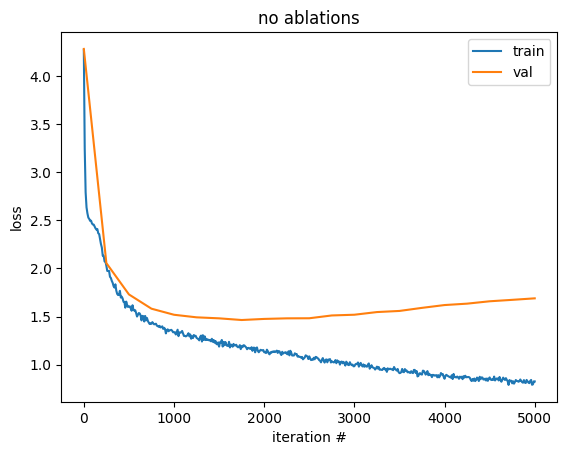

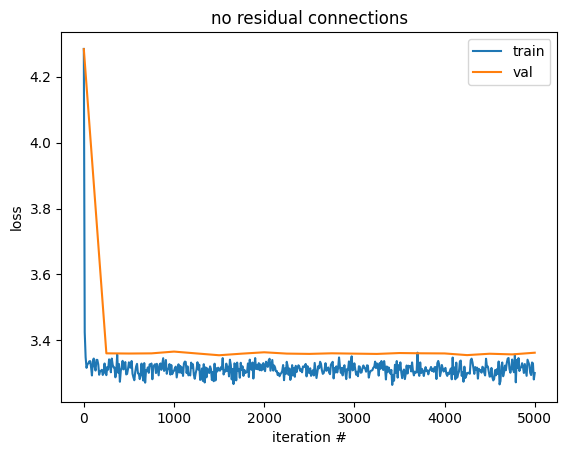

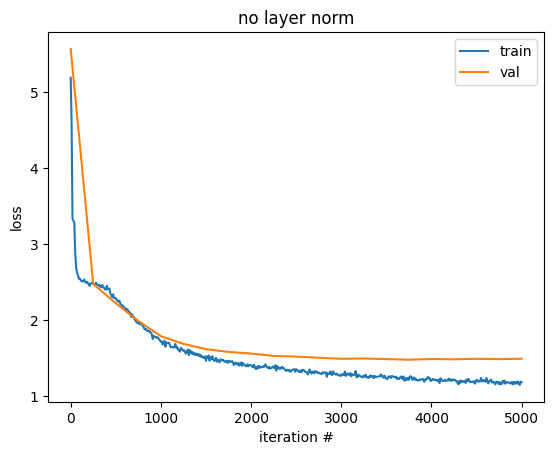

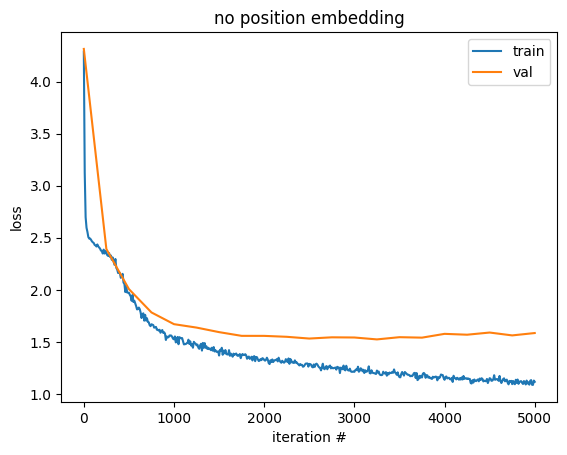

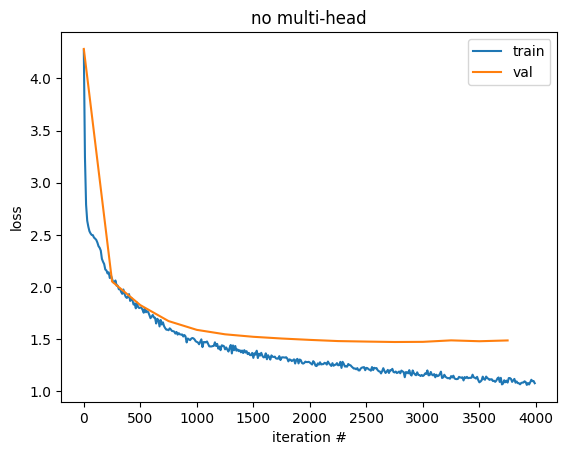

In [6]:
import re
import matplotlib.pyplot as plt

def create_ablation_plot(idx, title):
    with open(f"ablation{idx}") as f:
        data = f.read()
    pattern = r"iter (\d+): loss ([\d\.]+)"

    # Find all matches in the data
    matches = re.findall(pattern, data)

    # Convert matches to two separate lists: one for iter numbers, one for train loss values
    iter_nums = [int(match[0]) for match in matches]
    train_losses = [float(match[1]) for match in matches]

    pattern = r"step (\d+): .* val loss ([\d\.]+)"
    matches = re.findall(pattern, data)
    val_iter_nums = [int(match[0]) for match in matches]
    val_losses = [float(match[1]) for match in matches]

    plt.plot(iter_nums, train_losses)
    plt.plot(val_iter_nums, val_losses)
    plt.title(title)
    plt.ylabel('loss')
    plt.xlabel('iteration #')
    plt.legend(['train','val'])
    plt.show()
    return val_iter_nums, val_losses

ablation_to_title = {0: "no ablations", 1: "no residual connections", 2: "no layer norm", 3: "no position embedding", 4: "no multi-head"}
val_iter_nums = []
val_losses = []
for i in range(5):
    val_iter_nums_i, val_losses_i = create_ablation_plot(i, ablation_to_title[i])
    val_iter_nums.append(val_iter_nums_i)
    val_losses.append(val_losses_i)

It's a bit hard to compare across these different experiments, so we created a plot that shows all of the validation losses at once.

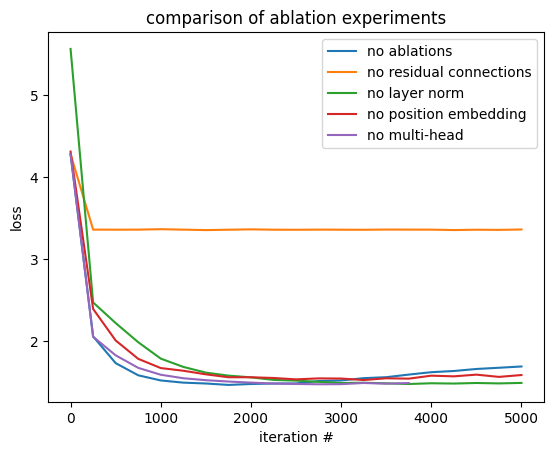

In [7]:
for i in range(5):
    plt.plot(val_iter_nums[i], val_losses[i])
plt.ylabel('loss')
plt.xlabel('iteration #')

plt.legend([ablation_to_title[i] for i in range(5)])
plt.title('comparison of ablation experiments')
plt.show()